#### Import Libraries

In [903]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

#### Get Data

In [735]:
df=pd.read_csv('GercekZamanliUretim-01012021-01022021.csv',encoding='latin-1')

In [736]:
df=df.rename(columns={"Toplam (MWh)": "toplam"})

In [737]:
df=df.dropna()

In [738]:
df.describe()

,toplam,Dogal Gaz,Baraj,Linyit,Akarsu,ithal Kömür,Rüzgar,Günes,Fuel Oil,Jeotermal,Asfaltit Kömür,Tas Kömür,Biyokütle,Nafta,LNG,Uluslararasi
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.0,744.0,744.000000
mean,35106.951398,11078.419435,4573.544368,4566.302272,1192.107272,7354.339046,3854.579798,58.628024,34.773952,1230.594973,229.348320,488.039798,569.165121,0.0,0.0,-122.890981
std,4890.383337,2234.471443,3021.381234,365.846064,405.333084,717.654501,1858.457729,89.107481,2.690340,41.446663,28.790249,52.623251,25.558508,0.0,0.0,146.567074
min,24460.270000,4147.790000,883.650000,3709.630000,426.260000,5151.060000,646.220000,0.000000,28.200000,1048.860000,99.360000,351.220000,493.730000,0.0,0.0,-484.000000
25%,30942.442500,9498.055000,1933.960000,4242.135000,870.067500,6762.880000,2280.652500,0.000000,33.300000,1203.892500,229.620000,462.737500,554.077500,0.0,0.0,-188.107500
50%,35408.040000,11715.780000,3982.450000,4634.750000,1184.590000,7367.600000,3781.705000,0.070000,35.800000,1235.480000,231.830000,480.760000,568.220000,0.0,0.0,-142.320000
75%,39329.097500,12629.280000,6529.382500,4892.785000,1524.500000,7878.627500,5421.000000,107.970000,36.700000,1262.145000,231.830000,493.987500,582.932500,0.0,0.0,-94.750000
max,44245.580000,14939.540000,12921.920000,5299.990000,2154.210000,8674.240000,7426.720000,341.130000,39.500000,1298.850000,355.480000,656.490000,649.680000,0.0,0.0,611.000000


In [739]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 743
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tarih           744 non-null    object 
 1   Saat            744 non-null    object 
 2   toplam          744 non-null    float64
 3   Dogal Gaz       744 non-null    float64
 4   Baraj           744 non-null    float64
 5   Linyit          744 non-null    float64
 6   Akarsu          744 non-null    float64
 7   ithal Kömür     744 non-null    float64
 8   Rüzgar          744 non-null    float64
 9   Günes           744 non-null    float64
 10  Fuel Oil        744 non-null    float64
 11  Jeotermal       744 non-null    float64
 12  Asfaltit Kömür  744 non-null    float64
 13  Tas Kömür       744 non-null    float64
 14  Biyokütle       744 non-null    float64
 15  Nafta           744 non-null    float64
 16  LNG             744 non-null    float64
 17  Uluslararasi    744 non-null    flo

##### Adjust features

In [740]:
fea_vals=['toplam','Dogal Gaz', 'Baraj', 'Linyit',
       'Akarsu', 'ithal Kömür', 'Rüzgar', 'Günes', 'Fuel Oil', 'Jeotermal',
       'Asfaltit Kömür', 'Tas Kömür', 'Biyokütle']

In [741]:
df[fea_vals].nunique()

toplam            743
Dogal Gaz         743
Baraj             744
Linyit            744
Akarsu            743
ithal Kömür       741
Rüzgar            744
Günes             373
Fuel Oil          107
Jeotermal         723
Asfaltit Kömür     88
Tas Kömür         713
Biyokütle         709
dtype: int64

##### Group it by days.

In [742]:
gunluk_toplam=df.groupby(['Tarih'])['toplam'].sum()
gunluk_toplam.head()

Tarih
01.01.2021    670869.20
02.01.2021    701173.37
03.01.2021    695757.46
04.01.2021    825829.43
05.01.2021    859905.70
Name: toplam, dtype: float64

In [743]:
gunluk=df.groupby(['Tarih'])[fea_vals].sum()
gunluk=gunluk.reset_index()
gunluk.head()

,Tarih,toplam,Dogal Gaz,Baraj,Linyit,Akarsu,ithal Kömür,Rüzgar,Günes,Fuel Oil,Jeotermal,Asfaltit Kömür,Tas Kömür,Biyokütle
0,01.01.2021,670869.20,154446.31,70349.58,118600.53,21795.46,172582.66,70279.77,1569.11,805.2,29678.68,5307.89,14654.18,13949.43
1,02.01.2021,701173.37,212244.27,95287.29,115779.50,16991.52,178817.66,21775.92,1477.74,866.3,29634.14,3190.36,14693.32,13828.07
2,03.01.2021,695757.46,215219.71,67270.50,113147.94,15888.61,187345.46,32154.26,1569.91,856.4,29650.59,5087.30,15018.06,13795.85
3,04.01.2021,825829.43,264835.26,98842.41,117776.40,18721.05,190899.53,72011.91,1570.12,868.0,29154.56,5312.29,13133.65,13810.98
4,05.01.2021,859905.70,263859.28,95011.17,118798.28,19070.18,200454.16,104335.83,1220.77,866.6,28578.16,6193.26,10799.67,13584.73


##### To get correlations of features to total energy value.

In [744]:
cors=list(map(lambda x: df['toplam'].corr(df[x]),fea_vals))
cors=pd.DataFrame(cors,index=[fea_vals])
cors=cors.reset_index()
cors.columns=['tip','cors']
cors.head()

,tip,cors
0,toplam,1.000000
1,Dogal Gaz,0.832064
2,Baraj,0.869240
3,Linyit,-0.169554
4,Akarsu,0.612283


<AxesSubplot:xlabel='cors', ylabel='tip'>

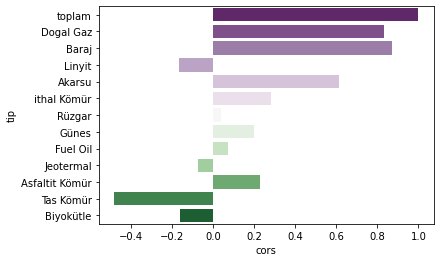

In [745]:
sns.barplot(y='tip',x='cors',data=cors,palette="PRGn")

##### Visualize Features

c:\users\dogac\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
c:\users\dogac\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
c:\users\dogac\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
c:\users\dogac\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


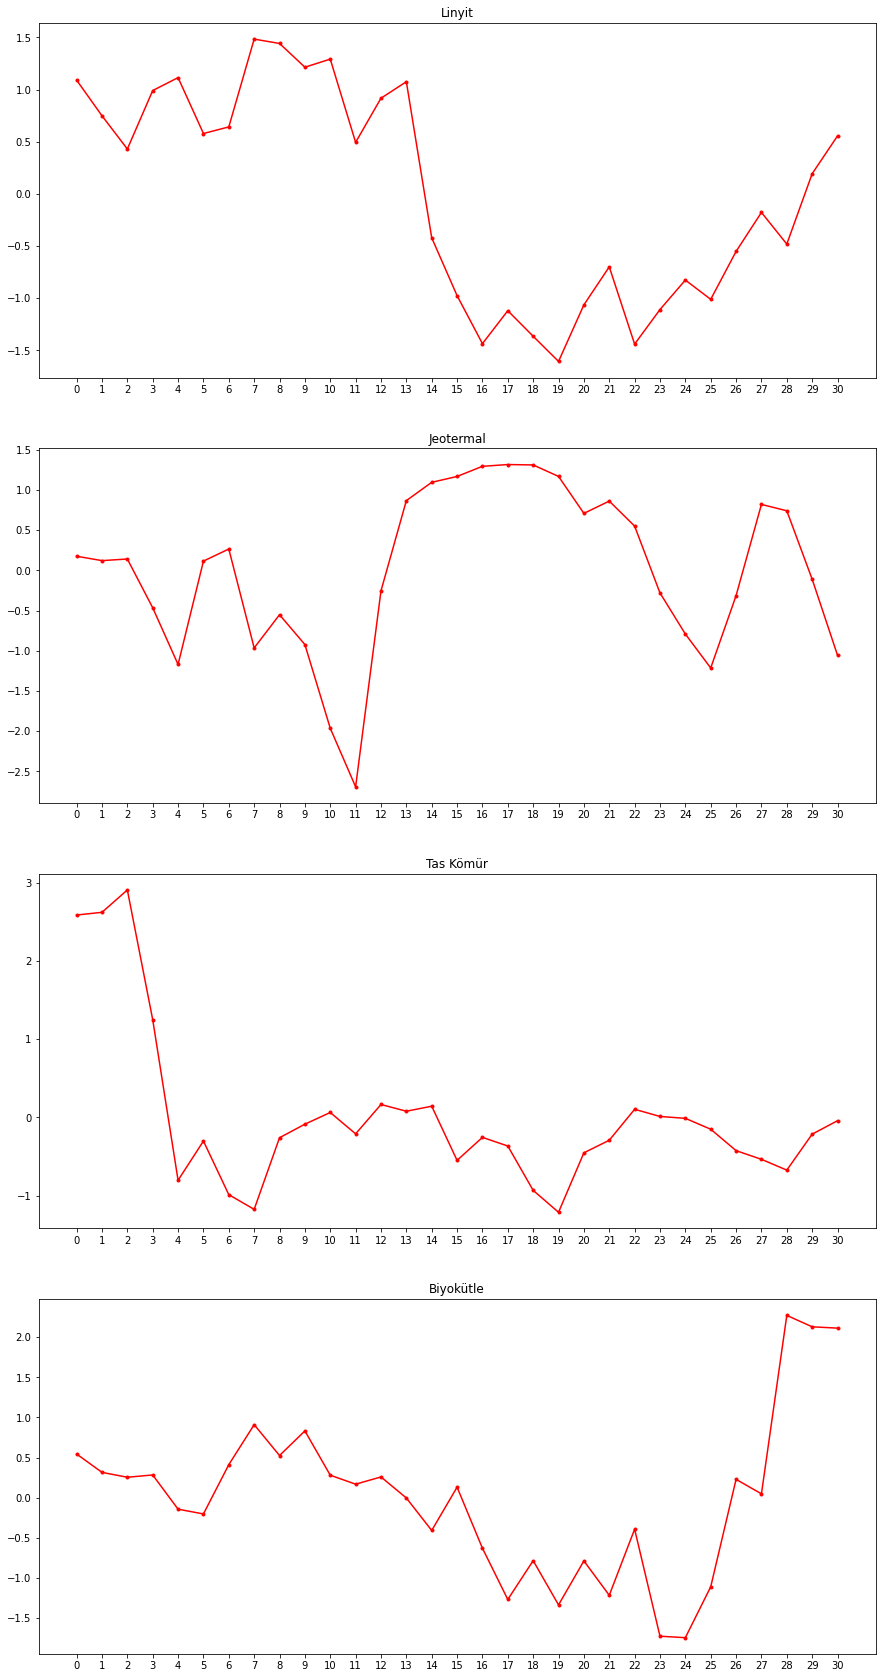

In [904]:
cors_down=cors[cors['cors']<0]['tip']

fig, axes = plt.subplots(nrows=4,figsize=(15, 30))
for i,j in enumerate(cors_down):
    axes[i].set_title(j)
    axes[i].plot(gunluk['Tarih'],gunluk[j],'r.-')
    axes[i].set_xticklabels(range(0,32))

The error below is because of the format of the strings in data, when trying to change labels on the graph it disappears.

c:\users\dogac\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
c:\users\dogac\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
c:\users\dogac\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
c:\users\dogac\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
c:\users\dogac\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
c:\users\dogac\appdata\local\programs\python\python36\lib\site-packages\ipy

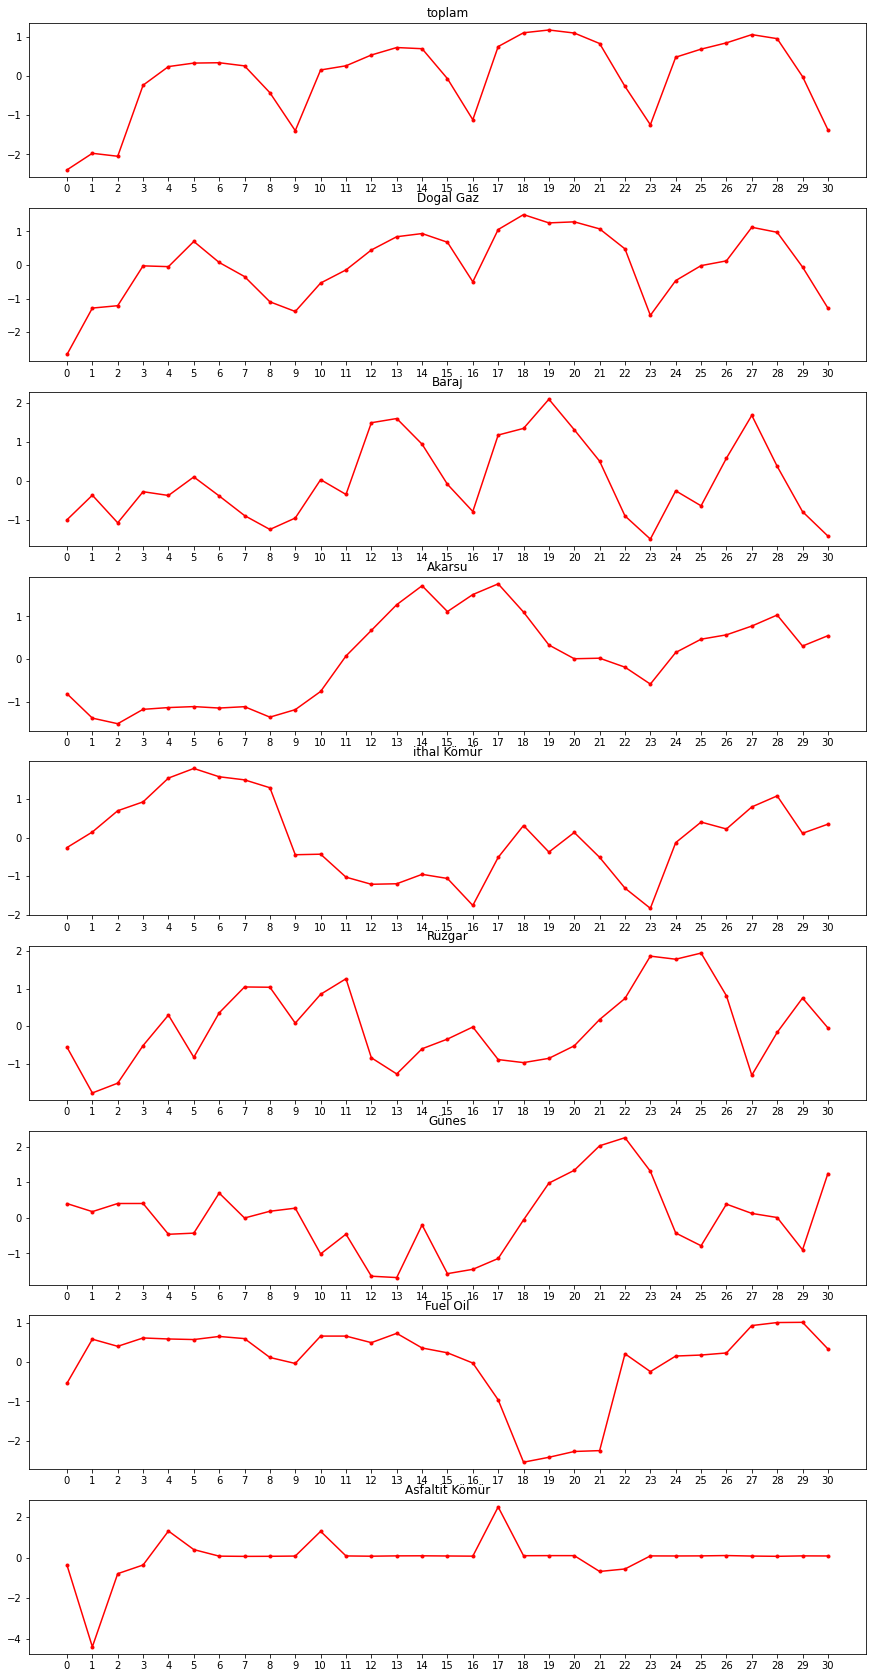

In [905]:
cors_up=cors[cors['cors']>0]['tip']

fig, axes = plt.subplots(nrows=9,figsize=(15, 30))
for i,j in enumerate(cors_up):
    axes[i].set_title(j)
    axes[i].plot(gunluk['Tarih'],gunluk[j],'r.-')
    axes[i].set_xticklabels(range(0,32))


##### Get price data.

In [753]:
ptf=pd.read_csv('PTF-01012021-01022021.csv')
ptf=ptf.dropna()
ptf.head()

,Tarih,Saat,PTF (TL/MWh),PTF (USD/MWh),PTF (EUR/MWh)
0,01/01/2021,00:00,"263,99","35,96","29,31"
1,01/01/2021,01:00,"236,99","32,29","26,31"
2,01/01/2021,02:00,"216,70","29,52","24,06"
3,01/01/2021,03:00,"218,07","29,71","24,21"
4,01/01/2021,04:00,"208,99","28,47","23,20"


In [750]:
ptf['PTF (TL/MWh)']=ptf['PTF (TL/MWh)'].apply(lambda x: x.replace(',','.'))

ptf=ptf.rename(columns={"PTF (TL/MWh)": "tlsaat_fiyat"})

##### Merge Price and Valued data.

In [751]:
ptf=ptf.drop(['PTF (USD/MWh)','PTF (EUR/MWh)','Saat'],axis=1)

ptf['tlsaat_fiyat']=ptf['tlsaat_fiyat'].apply(lambda x: float(x))

ptf['tl_fiyat']=ptf['tlsaat_fiyat']*df['toplam']

ptf_gunluk=ptf.groupby('Tarih')['tl_fiyat'].sum().reset_index()

ptf_gunluk['Tarih']=ptf_gunluk['Tarih'].apply(lambda x: x.replace('/','.'))

gunluk=gunluk.merge(ptf_gunluk,how='inner',on='Tarih')

gunluk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tarih           31 non-null     object 
 1   toplam          31 non-null     float64
 2   Dogal Gaz       31 non-null     float64
 3   Baraj           31 non-null     float64
 4   Linyit          31 non-null     float64
 5   Akarsu          31 non-null     float64
 6   ithal Kömür     31 non-null     float64
 7   Rüzgar          31 non-null     float64
 8   Günes           31 non-null     float64
 9   Fuel Oil        31 non-null     float64
 10  Jeotermal       31 non-null     float64
 11  Asfaltit Kömür  31 non-null     float64
 12  Tas Kömür       31 non-null     float64
 13  Biyokütle       31 non-null     float64
 14  tl_fiyat        31 non-null     float64
dtypes: float64(14), object(1)
memory usage: 3.9+ KB


In [752]:
gunluk.head()

,Tarih,toplam,Dogal Gaz,Baraj,Linyit,Akarsu,ithal Kömür,Rüzgar,Günes,Fuel Oil,Jeotermal,Asfaltit Kömür,Tas Kömür,Biyokütle,tl_fiyat
0,01.01.2021,670869.20,154446.31,70349.58,118600.53,21795.46,172582.66,70279.77,1569.11,805.2,29678.68,5307.89,14654.18,13949.43,1.744821e+08
1,02.01.2021,701173.37,212244.27,95287.29,115779.50,16991.52,178817.66,21775.92,1477.74,866.3,29634.14,3190.36,14693.32,13828.07,2.070652e+08
2,03.01.2021,695757.46,215219.71,67270.50,113147.94,15888.61,187345.46,32154.26,1569.91,856.4,29650.59,5087.30,15018.06,13795.85,2.032353e+08
3,04.01.2021,825829.43,264835.26,98842.41,117776.40,18721.05,190899.53,72011.91,1570.12,868.0,29154.56,5312.29,13133.65,13810.98,2.469408e+08
4,05.01.2021,859905.70,263859.28,95011.17,118798.28,19070.18,200454.16,104335.83,1220.77,866.6,28578.16,6193.26,10799.67,13584.73,2.505090e+08


In [894]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline

In [865]:
scaler=StandardScaler()
gunluk[fea_vals]=scaler.fit_transform(gunluk[fea_vals])

In [866]:
train_x, test_x, train_y, test_y=train_test_split(gunluk[fea_vals],gunluk['tl_fiyat'],test_size=0.3,random_state=31)

In [906]:
model =SGDRegressor(max_iter=5000)
model.fit(train_x,train_y)
pred=model.predict(test_x)
mean_squared_error(test_y,pred)

40916377755213.805

In order to test this model the Stochastic Gradient Descent is the most convenient method to fit it, model will be learn better when train size get larger...